# Diamonds In Depth Analysis.

## The case study interprets the various factors, features and components that affect the price of the diamond. The case study will comprise of data exploration i.e. understanding the relation between each features with the respective prices.

## A] Exploring the Dataset.

### A1] Importing libraries required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

import warnings
warnings.filterwarnings('ignore')

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 


###  A2] Extracting the dataset.

In [2]:
df = pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### A3] Gathering basic info on the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.shape

(53940, 10)

In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### From the information gathered above, we can easily determine that the feature 'price' would be our target variable. We have to build our algorithm around the target variable.

### A4] Checking for Null Values in dataset using Heatmap.

In [7]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

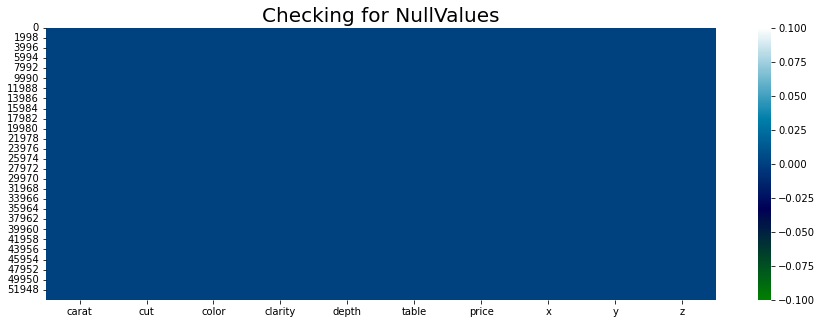

In [8]:
plt.figure(figsize = (15,5))
plt.title("Checking for NullValues", fontsize = 20)
sns.heatmap(df.isna(), cmap = 'ocean')
plt.show()

#### It's good that there are no Null Values. But as we can see in 'df.describe' the minimum value for 'x', 'y', 'z' is 0. It is physically impossible for the dimensions of diamond to be 0. These values should be considered as Null.

In [9]:
a = df[ (df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
a

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
len(a)

20

#### As the number of invalid entries in dataset are very minimal, dropping those instead of replacing them with their respective mean or median would be a better idea.

### A5] Dropping the invalid entries.

In [11]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

### A6] Cross checking if all the invalid entries have been dropped.

In [12]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


## B] Feature Co-relation.

### B1] Finding Co-relation between features.

In [13]:
corr = df.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


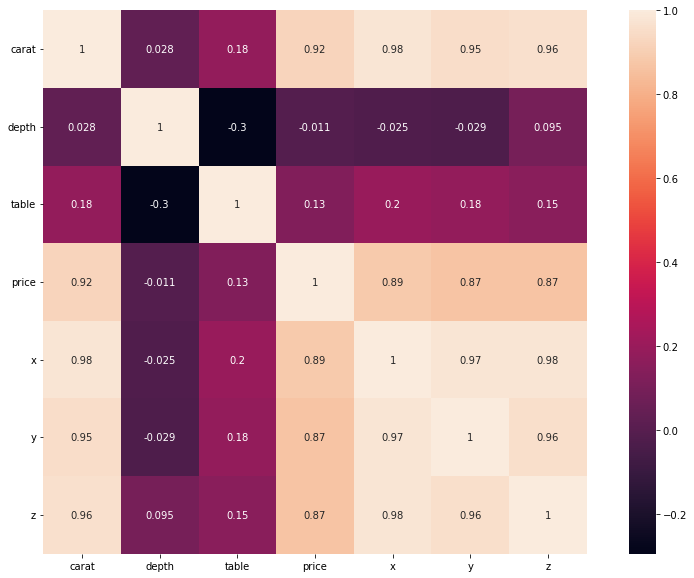

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
plt.yticks(rotation=0);

### From the above heatmap  we can conclude that :-

#### 1] The feature 'price' is highly co-related with the feature 'carat'.

#### 2] The feature 'depth' is inversly related with the feature 'price', as more the depth of the diamond, it looses its ability to reflect light. Resulting in the reduction of prices of the diamond.

#### 3] The feature 'price' is also highy co-related with the dimensions i.e. 'x', 'y', 'z' features. This is expected as bigger the volume of the diamond, it will cost more.

## C] Visualizing each feature with the target variable.

### C.i] Carat Vs Price.

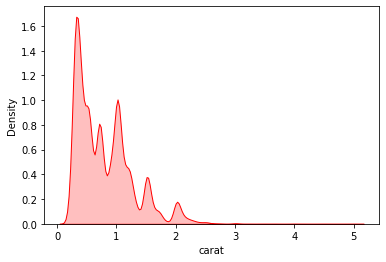

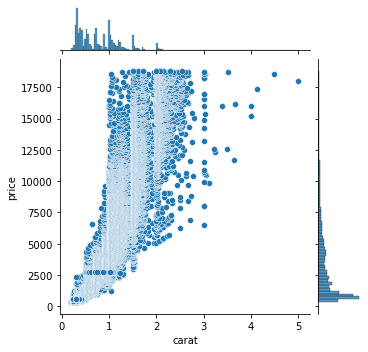

In [15]:
sns.kdeplot(df['carat'], shade=True , color='r')
sns.jointplot(x='carat' , y='price' , data=df , size=5)

#### The price of the diamond is linearly depended on the carat. More the carat, more is the price.

### C.ii] Cut Vs Price.

In [16]:
b = np.array(df['cut'].unique())
b

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [17]:
df['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

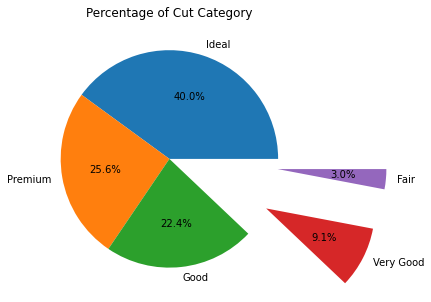

In [18]:
plt.figure(figsize = (15,5))
plt.title("Percentage of Cut Category")
plt.pie(df['cut'].value_counts(), labels = b , explode = (0,0,0,1,1), autopct = "%1.1f%%")
plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

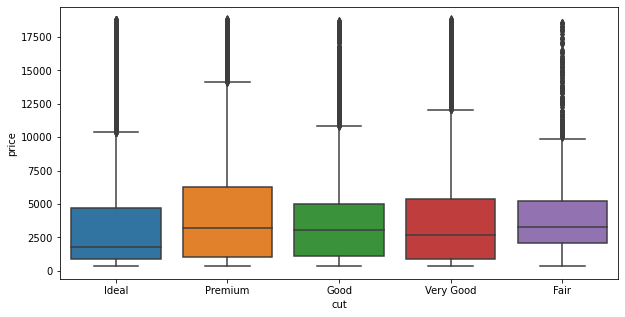

In [19]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'cut', y = 'price')

#### Premium cut diamonds are the most expensive type of diamonds.

### C.iii] Color Vs Price.

In [20]:
c = np.array(df['color'].unique())
c

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<AxesSubplot:xlabel='color', ylabel='count'>

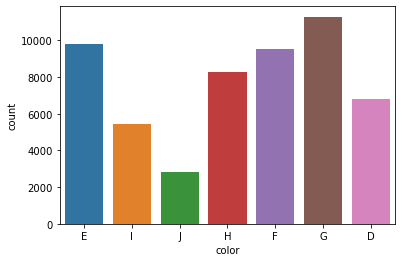

In [21]:
sns.countplot(data = df, x = 'color')

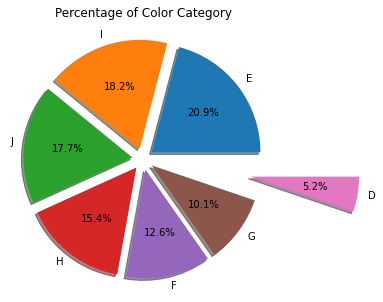

In [22]:
plt.figure(figsize = (15,5))
plt.title("Percentage of Color Category")
plt.pie(df['color'].value_counts(), labels = c , explode = (0.1,0.1,0.1,0.1,0.1,0.1,1), autopct = "%1.1f%%", shadow = True)
plt.show()

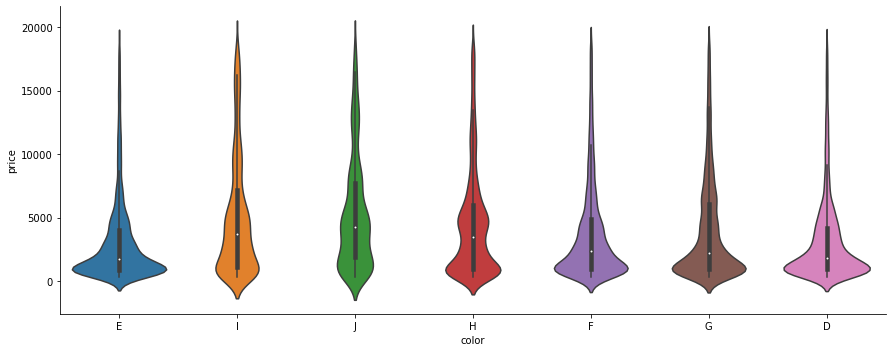

In [23]:
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2.5)

#### The colorless diamonds are more expensive as compared to the diamonds with color.

### C.iv] Clarity Vs Price

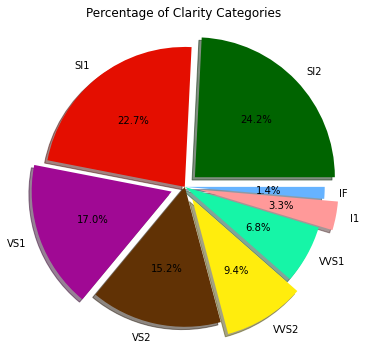

In [24]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<AxesSubplot:title={'center':' Clarity Vs Price'}, xlabel='clarity', ylabel='price'>

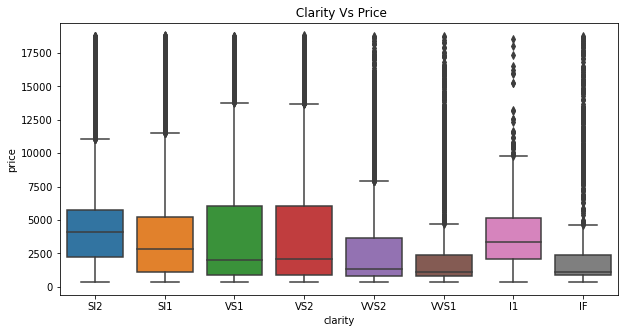

In [25]:
plt.figure(figsize = (10,5))
plt.title(" Clarity Vs Price")
sns.boxplot(x='clarity', y='price', data=df )

#### From the boxplot, we can conclude that the cut type 'VS1' and 'VS2' are more expensive from the rest.

### C.v] Depth Vs Price

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <BarContainer object of 25 artists>)

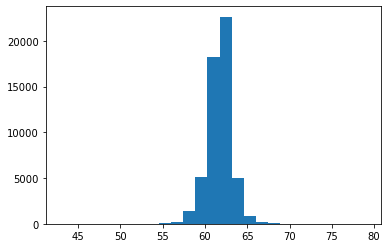

In [26]:
plt.hist('depth' , data=df , bins=25)

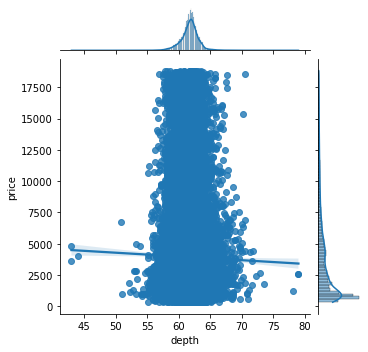

In [27]:
sns.jointplot(x='depth', y='price' , data=df , kind='reg', size=5)

### C.vi] Table Vs Price.

<AxesSubplot:xlabel='table', ylabel='Density'>

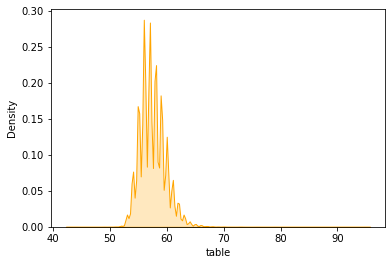

In [28]:
sns.kdeplot(df['table'] ,shade=True , color='orange')

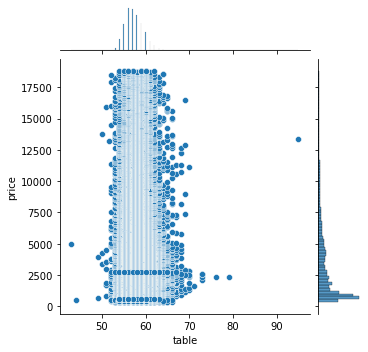

In [29]:
sns.jointplot(x='table', y='price', data=df , size=5)

### C.vii] Dimensions Vs Price.

(2.0, 10.0)

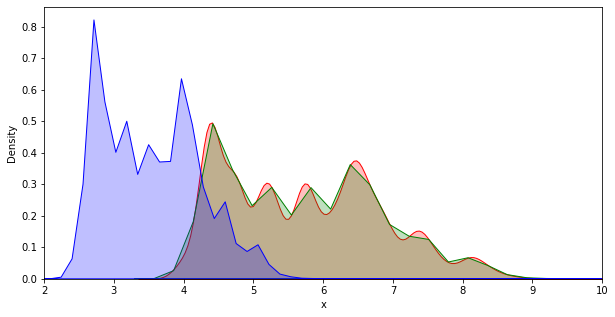

In [30]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

#### It was obvious that increase in dimension or volume of diamond would increase the price.

## D] Feature Engineering.

#### As we can see that the features 'x', 'y' &'z' are the dimensions of the diamonds. We can converge these into a anew feature volume for better analysis.

### D1]  Creating a new Feature 'volume'.

In [31]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


### D2] Dropping the features 'x', 'y' & 'z'.

In [32]:
df.drop(['x','y','z'], axis=1, inplace= True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


### D3] Assessing the new feature w.r.t. 'price'.

(0.0, 50000.0)

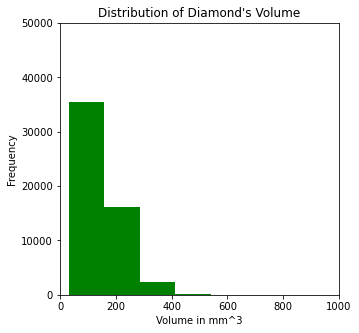

In [33]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

## E] Label Encoding.

#### As we can see that out dataset contains categorical data, we need to label encode them.

### E1] Splitting the dataset into categorical and numerical.

In [34]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['int64', 'float64'])

In [35]:
df_cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


### E2] Label encoding the categorical data.

In [36]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object' :
        categorical_col.append(i)
print("Categorical columns present in the datasets are: \n", categorical_col)

Categorical columns present in the datasets are: 
 ['cut', 'color', 'clarity']


In [37]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


## F] Feature Scaling.

#### We need to scale down the values in our dataset to ease out our calculations.

### F1] Splitting dataset into Train & Test.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x = df.drop(['price'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)

### F2] Building a model for algorithm testing.

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error


In [42]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [51]:
def mymodel(model):
    model.fit(x_train, y_train)
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5,verbose = 1)
    y_pred = model.predict(x_test)
    
    
    train = model.score(x_train, y_train)
    test = model.score(x_test, y_test)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    
    print('')
    print("*****", model , "*****")
    print('Score : %.4f' % model.score(x_test, y_test))
    print(accuracies)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    
    print('')
    print('MSE    : %0.2f ' % mse)
    print('MAE    : %0.2f ' % mae)
    print('RMSE   : %0.2f ' % rmse)
    print('R2     : %0.2f ' % r2)

    R2_Scores.append(r2)
    
    return model

In [52]:
lr = mymodel(LinearRegression())
ar = mymodel(AdaBoostRegressor())
rr = mymodel(Ridge())
gbr = mymodel(GradientBoostingRegressor())
rf = mymodel(RandomForestRegressor())
kn = mymodel(KNeighborsRegressor())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Training Accuracy : 0.8804080171332576
Testing Accuracy : 0.8800909499700584



***** LinearRegression() *****
Score : 0.8801
[0.87848956 0.87629556 0.87867783 0.88025387 0.7093961 ]

MSE    : 1821460.45 
MAE    : 919.67 
RMSE   : 1349.61 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.4s finished


Training Accuracy : 0.890644596608649
Testing Accuracy : 0.8812761920980259



***** AdaBoostRegressor() *****
Score : 0.8813
[0.88611227 0.89245285 0.8909148  0.87861447 0.90610449]

MSE    : 1803456.21 
MAE    : 1034.73 
RMSE   : 1342.93 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


Training Accuracy : 0.880407792509302
Testing Accuracy : 0.8800926270307836



***** Ridge() *****
Score : 0.8801
[0.87849191 0.87630519 0.87868344 0.88026172 0.70476027]

MSE    : 1821434.97 
MAE    : 919.61 
RMSE   : 1349.61 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.5s finished


Training Accuracy : 0.9724667530365758
Testing Accuracy : 0.9688813785691008



***** GradientBoostingRegressor() *****
Score : 0.9689
[0.96984316 0.97037084 0.97119175 0.97088402 0.97297908]

MSE    : 472702.75 
MAE    : 362.60 
RMSE   : 687.53 
R2     : 0.97 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


Training Accuracy : 0.997288819349
Testing Accuracy : 0.9791811711920834



***** RandomForestRegressor() *****
Score : 0.9792
[0.98045926 0.97980839 0.97960191 0.97954892 0.97964676]

MSE    : 316245.30 
MAE    : 275.29 
RMSE   : 562.36 
R2     : 0.98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


Training Accuracy : 0.9611090790990229
Testing Accuracy : 0.9369285011406803



***** KNeighborsRegressor() *****
Score : 0.9369
[0.93550213 0.93568615 0.93705141 0.93913071 0.94071929]

MSE    : 958078.15 
MAE    : 485.76 
RMSE   : 978.81 
R2     : 0.94 


#### As we can see that, the algorithm of "Random Forest Regressor" has the best R2 Score and both the training and testing accuracy are appropiate for the model.

### F3] Hyper-paramter Tuning.

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators':[100],
    'n_jobs':[-1],
    'max_features':["auto",'sqrt','log2']}

In [63]:
grid = GridSearchCV(RandomForestRegressor(),  #model
                    parameters,             #hyperparameters
                    verbose=3,             #way of computation
                    cv=5,                  #cross validation
                    scoring="r2")    #metrics 

In [64]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END max_features=auto, n_estimators=100, n_jobs=-1;, score=0.980 total time=   7.9s
[CV 2/5] END max_features=auto, n_estimators=100, n_jobs=-1;, score=0.980 total time=   5.1s
[CV 3/5] END max_features=auto, n_estimators=100, n_jobs=-1;, score=0.980 total time=   5.0s
[CV 4/5] END max_features=auto, n_estimators=100, n_jobs=-1;, score=0.980 total time=   5.1s
[CV 5/5] END max_features=auto, n_estimators=100, n_jobs=-1;, score=0.980 total time=   5.1s
[CV 1/5] END max_features=sqrt, n_estimators=100, n_jobs=-1;, score=0.977 total time=   2.7s
[CV 2/5] END max_features=sqrt, n_estimators=100, n_jobs=-1;, score=0.976 total time=   2.7s
[CV 3/5] END max_features=sqrt, n_estimators=100, n_jobs=-1;, score=0.975 total time=   2.6s
[CV 4/5] END max_features=sqrt, n_estimators=100, n_jobs=-1;, score=0.976 total time=   2.5s
[CV 5/5] END max_features=sqrt, n_estimators=100, n_jobs=-1;, score=0.977 total time=   2.7s
[CV 1/5] E

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100], 'n_jobs': [-1]},
             scoring='r2', verbose=3)

In [65]:
grid.best_params_

{'max_features': 'auto', 'n_estimators': 100, 'n_jobs': -1}

In [66]:
grid.best_score_

0.9798103317476053

In [67]:
grid.best_estimator_

RandomForestRegressor(n_jobs=-1)

In [68]:
dt = mymodel(grid.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.6s finished


Training Accuracy : 0.9972922365589991
Testing Accuracy : 0.9792476433165977



***** RandomForestRegressor(n_jobs=-1) *****
Score : 0.9792
[0.98048648 0.97976915 0.97968511 0.97954329 0.97975857]

MSE    : 315235.56 
MAE    : 275.63 
RMSE   : 561.46 
R2     : 0.98 


### With the R2 Score of 0.98 and accuracy score of 0.9792, we can conclude that the algorithm 'Random Forest Regressor' is the best for our model.